# Identify hand motions from EEG recordings

Kaggle competition: https://www.kaggle.com/c/grasp-and-lift-eeg-detection
Przydatne linki:
  * https://hal.inria.fr/hal-01055103/file/lotte_EEGSignalProcessing.pdf - Opis BCI (Brain Computer Interface)
  * http://sccn.ucsd.edu/wiki/Introduction_To_Modern_Brain-Computer_Interface_Design - Kurs o BCI
  
Zbiór danych składa się z 2 plików na każdą przeprowadzoną serię:
  * the *_data.csv files contain the raw 32 channels EEG data (sampling rate 500Hz)
  * the *_events.csv files contains the ground truth frame-wise labels for all events
  
Nazwa pliku zawiera ID osoby oraz numer serii. Każda osoba wykonała 10 serii. Każdy plik zawiera około 30 powtórzeń ćwiczenia.

Więcej informacje znajduje się na stronie: https://www.kaggle.com/c/grasp-and-lift-eeg-detection/data

###Poniższe wideo pokazuje ruchy wykonywane podczas pobierania danych

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("y3_Izuop2gY")

## Analiza pliku z danymi

In [6]:
%matplotlib inline
import pandas as pd

data = pd.read_csv("train/subj1_series1_data.csv", index_col=0)
events = pd.read_csv("train/subj1_series1_events.csv", index_col=0)
df = data.join(events)

print("Plik zawiera %d eventów (%f sekund.)" % (len(df), len(df)/500))
print("Nazwy kolumn:\n %s" % str(list(df.columns.values)))

Plik zawiera 119496 eventów (238.992000 sekund.)
Nazwy kolumn:
 ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'HandStart', 'FirstDigitTouch', 'BothStartLoadPhase', 'LiftOff', 'Replace', 'BothReleased']


Pojedyńczy plik zawiera serię powtórzeń (średnio 30). Aby pokazać na wykresie jedno powtórzenie zadania należy pobierać dane do pierwszego eventu 'BothReleased'

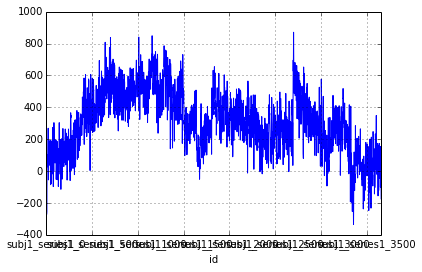

In [17]:
index = df[df["BothReleased"] == 1].index[0]
fp1 = df["Fp1"].loc[:index]
fp1.plot()

## TODO

  * Wczytanie plików z eventami
  * Powiązanie ich z danymi z EEG
  * Pokazanie na wykresie punktów w których startują poszczególne fazy
  * Zrobienie tego dla wszystkich elektrod
  * Opisanie elektrod za pomocą miejsc do których zostały przymocowane